#### Generate mutation indicator plots for simulated viral samples (Figure 4)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import seaborn as sns

%matplotlib inline

In [21]:
initial_sequence = SeqIO.read("./rhinoC_virapops_output/DERISI_HRC_100.1", "fasta")
s100 = initial_sequence.seq

In [22]:
seq_95perc = SeqIO.read("./rhinoC_virapops_output/DERISI_HRC_095.1", "fasta")
s95 = seq_95perc.seq.upper()

In [23]:
seq_75perc = SeqIO.read("./rhinoC_virapops_output/DERISI_HRC_075.1", "fasta")
s75 = seq_75perc.seq.upper()

In [24]:
seq_50perc = SeqIO.read("./rhinoC_virapops_output/DERISI_HRC_050.1", "fasta")
s50 = seq_50perc.seq.upper()

In [26]:
mutations_95 = [s95[i] == s100[i] for i in range(len(s95))]
mutations_75 = [s75[i] == s100[i] for i in range(len(s75))]
mutations_50 = [s50[i] == s100[i] for i in range(len(s50))]


In [32]:

def sliding_window_perc_ident(mutations_array):
    ws = 50
    new_mut = [0] * len(mutations_array)
    for i in range(len(mutations_array) - ws):
        new_mut[i] = sum(mutations_array[i:(i+ws)])/len(mutations_array[i:(i+ws)])

    return(new_mut)

avg_mut_95 = sliding_window_perc_ident(mutations_95)
avg_mut_75 = sliding_window_perc_ident(mutations_75)
avg_mut_50 = sliding_window_perc_ident(mutations_50)


In [28]:
colpal_dark = sns.color_palette("husl", 12)

In [29]:
# These features come from this NCBI entry: https://www.ncbi.nlm.nih.gov/nuccore/NC_009996

virus_features =  [1 for i in range(616,817)] + [2 for i in range(817,1600)]  + [3 for i in range(1600,2305)] + [4 for i in range(2305,3127)] + [5 for i in range(3127, 3553)] + [6 for i in range(3553, 3850)] + [7 for i in range(3850, 4828)] + [8 for i in range(4828, 5053)] + [9 for i in range(5053, 5119)]+ [10 for i in range(5119, 5668)]+ [11 for i in range(5668, 7047)]


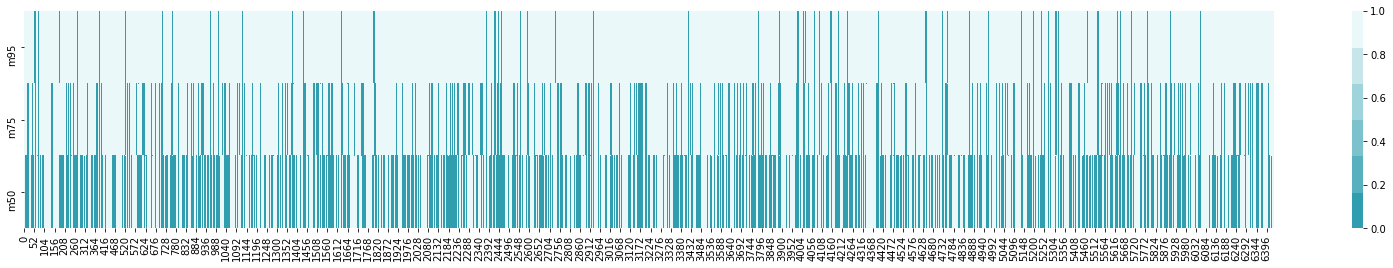

In [30]:
df = pd.DataFrame({'m95':mutations_95,'m75':mutations_75,'m50':mutations_50})

import seaborn as sns
plt.figure(figsize = (28,4))
pal = sns.light_palette((210, 90, 60), input="husl")
pal.reverse()
sns.heatmap(df.transpose(), cmap=pal)
plt.savefig('rhinoc_mutations_heatmap.pdf')

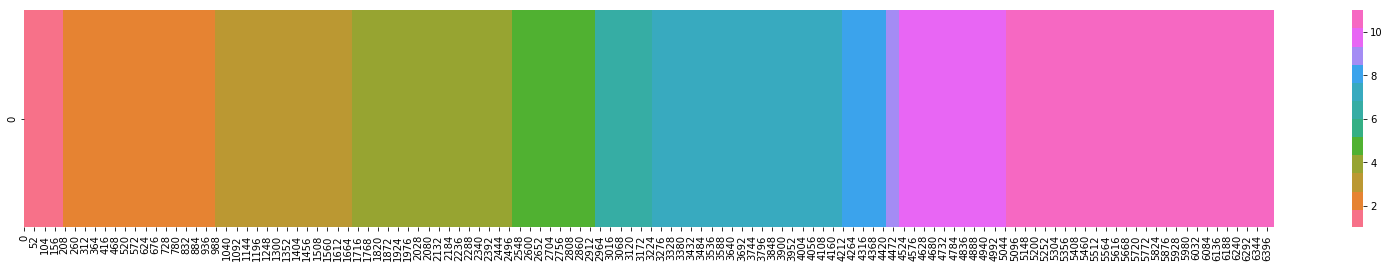

In [31]:
plt.figure(figsize = (28,4))
sns.heatmap(pd.DataFrame(virus_features).transpose(), cmap=colpal_dark)
plt.savefig('rhinoc_genome_heatmap.pdf')